In [3]:
# Import libraries
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

## One-vs-All (OVA) Logistic Regression for Handwritten Digits
### a.) Load data and display images

In [4]:
data = sio.loadmat("digits.mat")
X = data['X']
Y = np.squeeze(data['y'])
np.place(Y, Y==10, 0)
numExamples = X.shape[0]
numFeatures = X.shape[1]
numLabels = 10

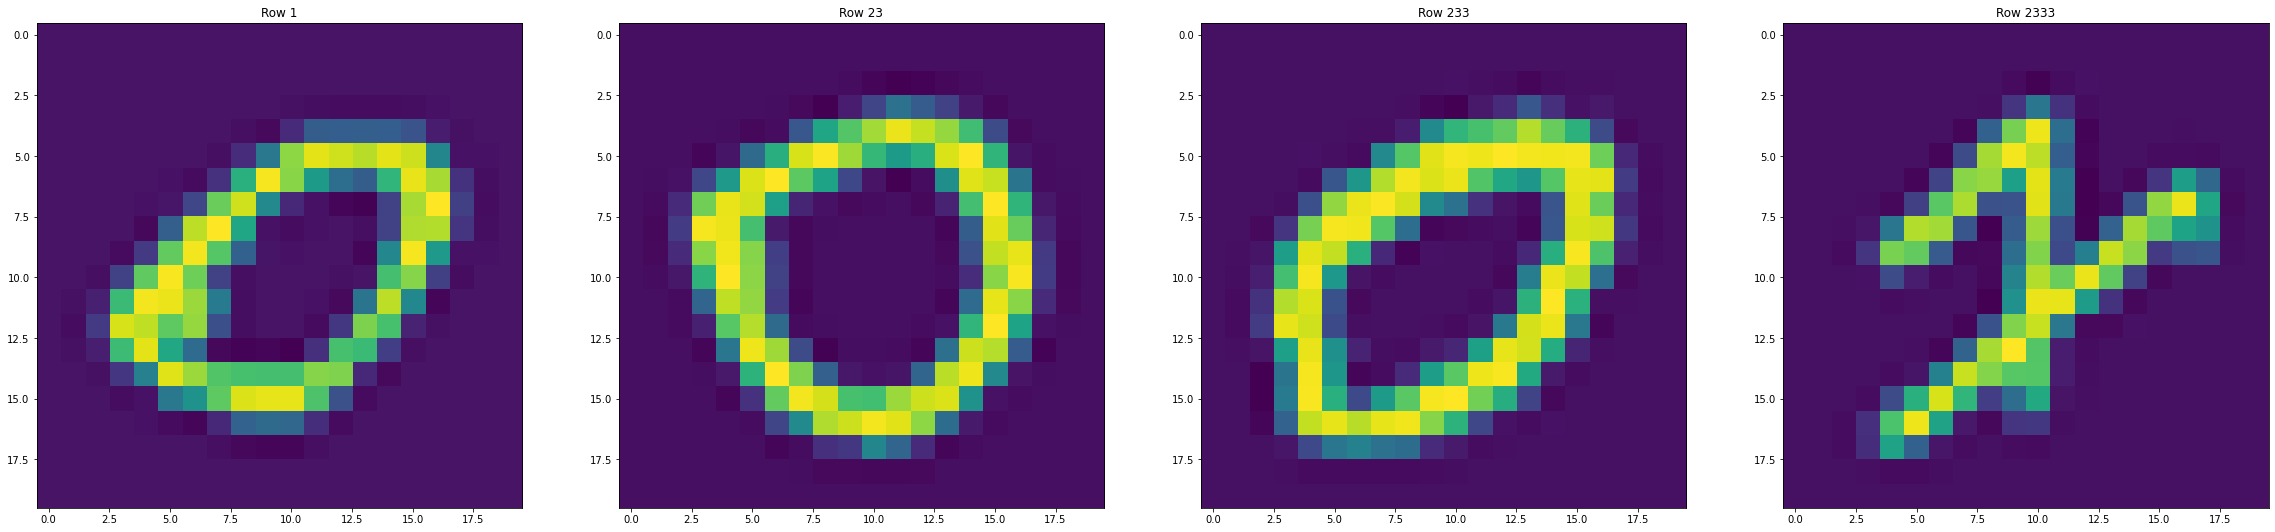

In [5]:
test1 = X[0, :].reshape(20, 20)
test23 = X[22, :].reshape(20, 20)
test233 = X[232, :].reshape(20, 20)
test2333 = X[2332, :].reshape(20, 20)
fig, _ = plt.subplots(nrows=1, ncols=4, figsize =(40,10))
plt.subplot(141)
plt.title('Row 1')
plt.imshow(test1)
plt.subplot(142)
plt.title('Row 23')
plt.imshow(test23)
plt.subplot(143)
plt.title('Row 233')
plt.imshow(test233)
plt.subplot(144)
plt.title('Row 2333')
plt.imshow(test2333)
plt.show()

## b.) Training the OVA classifier with gradient descent

### - Making training and testing dataset by parsing

In [6]:
trainingSet = np.zeros((4000, 400))
trainingData = np.zeros((4000, 1))
for i in range(10):
    trainingSet[400*i : 400*(i+1), :] = X[500*i : 500*i + 400, :]
    trainingData[400*i : 400*(i+1)] = Y[500*i : 500*i + 400][:, np.newaxis]
    
testingSet = np.zeros((1000, 400))
testingData = np.zeros((1000, 1))
for i in range(10):
    testingSet[100*i : 100*(i+1), :] = X[500*i + 400 : 500*(i+1), :]
    testingData[100*i : 100*(i+1)] = Y[500*i + 400 : 500*(i+1)][:, np.newaxis]

### - Function definitions

In [24]:
def sigmoid(X, w):
    if w.shape[0] == 1:
        w = np.transpose(w)
    if (X.shape[1] + 1) < w.shape[0]:
        raise ValueError("Too many weights for features.")
    elif (X.shape[1] + 1) > w.shape[0]:
        raise ValueError("Not enough weights for features.")
    else:
        """ Append bias term for first weight """
        bias = np.ones((X.shape[0], 1))
        X = np.hstack((bias, X))

    """ Sigmoid function, returns N values for N samples """
    sig = np.divide(1, 1 + np.exp(-X @ w))
    sig[sig == 1.0] = 0.9999
    sig[sig == 0.0] = 0.0001

    return sig
    
def loss(X, Y, w):
    J = 1/len(Y)*np.sum(np.nan_to_num(-Y * np.log(sigmoid(X, w)) - (1-Y) * np.log(1 - sigmoid(X, w))))
    
    return J

def gradient(X, Y, w):
    G = np.empty_like(w)
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((bias, X))
    for i in range(len(G)):
        G[i] = 1/len(Y)*np.sum((sigmoid(X[:,1:], w) - Y) * X[:, i][:, np.newaxis])

    return G

def predict(X, Y, w, learn_rate, max_iter=1e6, tol=5e-8):
    """ Using Stochastic Gradient Descent """
    N, M = X.shape
    cost_arr = []
    first_iter = True

    for i in range(int(max_iter)):
        idx = np.random.randint(N)
        X_sample = X[[idx], :]
        Y_sample = Y[[idx]]
        pred = sigmoid(X_sample, w)

        w -= learn_rate * gradient(X_sample, Y_sample, w)
        J = loss(X_sample, Y_sample, w)
        if first_iter:
            diff = J
            first_iter = False
        else:    
            diff = np.abs(J - cost_arr[-1])

        if diff < tol:
            break
        cost_arr.append(J)

    return pred, i, w, cost_arr

# def predict(X, Y, w0, learn_rate):
#     J = loss(X, Y, w0)
#     cost_arr = np.array(J)

#     """ Batch Gradient Descent """
#     i = 0
#     while J > 0.3:
#         w1 = w0 - learn_rate * gradient(X, Y, w0)
#         J = loss(X, Y, w1)
#         cost_arr = np.append(cost_arr, J)
#         w0 = w1
#         i += 1
#         if i > 1e2:
#             break
    
#     pred = sigmoid(X, w0)
#     return pred, i, w0, cost_arr

### - Optimize weights and get cost vs. steps curve

Weights optimized for predicting 0!

Weights optimized for predicting 1!

Weights optimized for predicting 2!

Weights optimized for predicting 3!

Weights optimized for predicting 4!

Weights optimized for predicting 5!

Weights optimized for predicting 6!

Weights optimized for predicting 7!

Weights optimized for predicting 8!

Weights optimized for predicting 9!



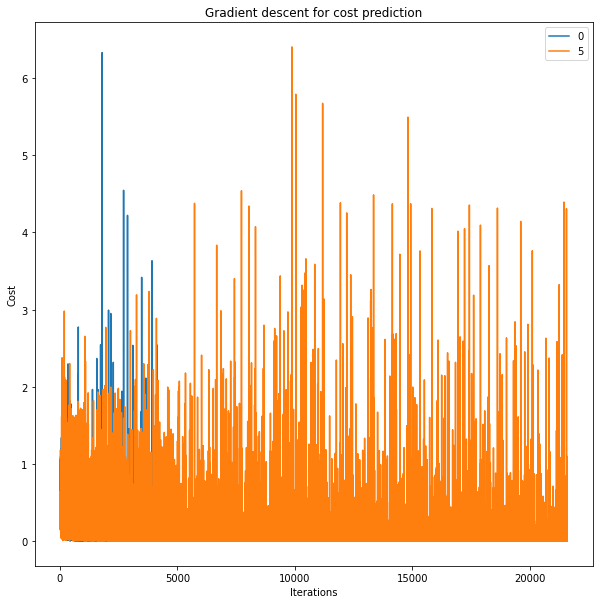

In [37]:
w_arr = np.empty((numFeatures + 1, 10))
plt.figure(figsize=(10, 10))
for j in range(10):
    _, i, w, cost_arr = predict(trainingSet, (trainingData == j).astype(int), np.zeros((numFeatures + 1, 1)), 0.01)
    w_arr[:, j][:, np.newaxis] = w
    if j == 0 or j == 5:
        plt.plot(np.arange(0, i), cost_arr, label=str(j))
    print("Weights optimized for predicting {}!\n".format(j))
plt.title("Gradient descent for cost prediction")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

### - Prediction on testing data

In [38]:
test_pred = np.zeros_like(testingData)
for i in range(len(test_pred)):
    test_pred[i] = np.argmax(sigmoid(testingSet[i, :][np.newaxis, :], w_arr))
test_acc = np.count_nonzero(test_pred == testingData)/len(testingData) * 100
print("Testing accuracy is {} %\n".format(test_acc))

Testing accuracy is 88.5 %



### - Prediction on training data

In [39]:
train_pred = np.zeros_like(trainingData)
for i in range(len(train_pred)):
    train_pred[i] = np.argmax(sigmoid(trainingSet[i, :][np.newaxis, :], w_arr))
train_acc = np.count_nonzero(train_pred == trainingData)/len(trainingData) * 100
print("Training accuracy is {} %\n".format(train_acc))

Training accuracy is 90.17500000000001 %



## c.) Verify trained models and compare against sklearn trained models

## Verifying trained models using entire data set

In [40]:
full_pred = np.zeros_like(Y)
for i in range(numExamples):
    full_pred[i] = np.argmax(sigmoid(X[i, :][np.newaxis, :], w_arr))
fulltest_acc = np.count_nonzero(full_pred == Y)/len(Y) * 100
print("Full dataset testing accuracy is {} %\n".format(fulltest_acc))

Full dataset testing accuracy is 89.84 %



### - Reporting the predictions for 1st, 23th, 233th, 2333th images

In [41]:
nums = [1, 23, 233, 2333]
for i in nums:
    print("The prediction for image {} is {}\n".format(i, full_pred[i]))

The prediction for image 1 is 0

The prediction for image 23 is 0

The prediction for image 233 is 0

The prediction for image 2333 is 4



## Sklearn training

In [32]:
clf = OneVsRestClassifier(SVC()).fit(trainingSet, trainingData)

### - Testing data

In [30]:
Z = clf.predict(testingSet)[:, np.newaxis]
test_acc = clf.score(testingSet, testingData) * 100
print("Testing data accuracy in sklearn is {} %".format(test_acc))

Testing data accuracy in sklearn is 95.1 %


### - Training data

In [35]:
Z = clf.predict(trainingSet)[:, np.newaxis]
train_acc = clf.score(trainingSet, trainingData) * 100
print("Training data accuracy in sklearn is {} %".format(train_acc))

Training data accuracy in sklearn is 98.32499999999999 %


### - Entire set of data

In [36]:
Z = clf.predict(X)[:, np.newaxis]
fulltest_acc = clf.score(X, Y) * 100
print("Full dataset testing accuracy in sklearn is {} %".format(fulltest_acc))

Full dataset testing accuracy in sklearn is 97.68 %
